In [16]:
using DataFrames, CSV, CairoMakie

function _dat2csv(dat_path::AbstractString, csv_path::AbstractString)
    open(csv_path, write=true) do io
        for line in eachline(dat_path)
            join(io, split(line), ',')
            println(io)
        end
    end
    return csv_path
end

function dat2csv(dat_path::AbstractString)
    base, ext = splitext(dat_path)
    ext == ".dat" ||
        throw(ArgumentError("file name doesn't end with `.dat`"))
    return _dat2csv(dat_path, "$base.csv")
end

dat2csv (generic function with 1 method)

  0.592754 seconds (2.69 M allocations: 206.058 MiB, 2.62% gc time, 5.72% compilation time)


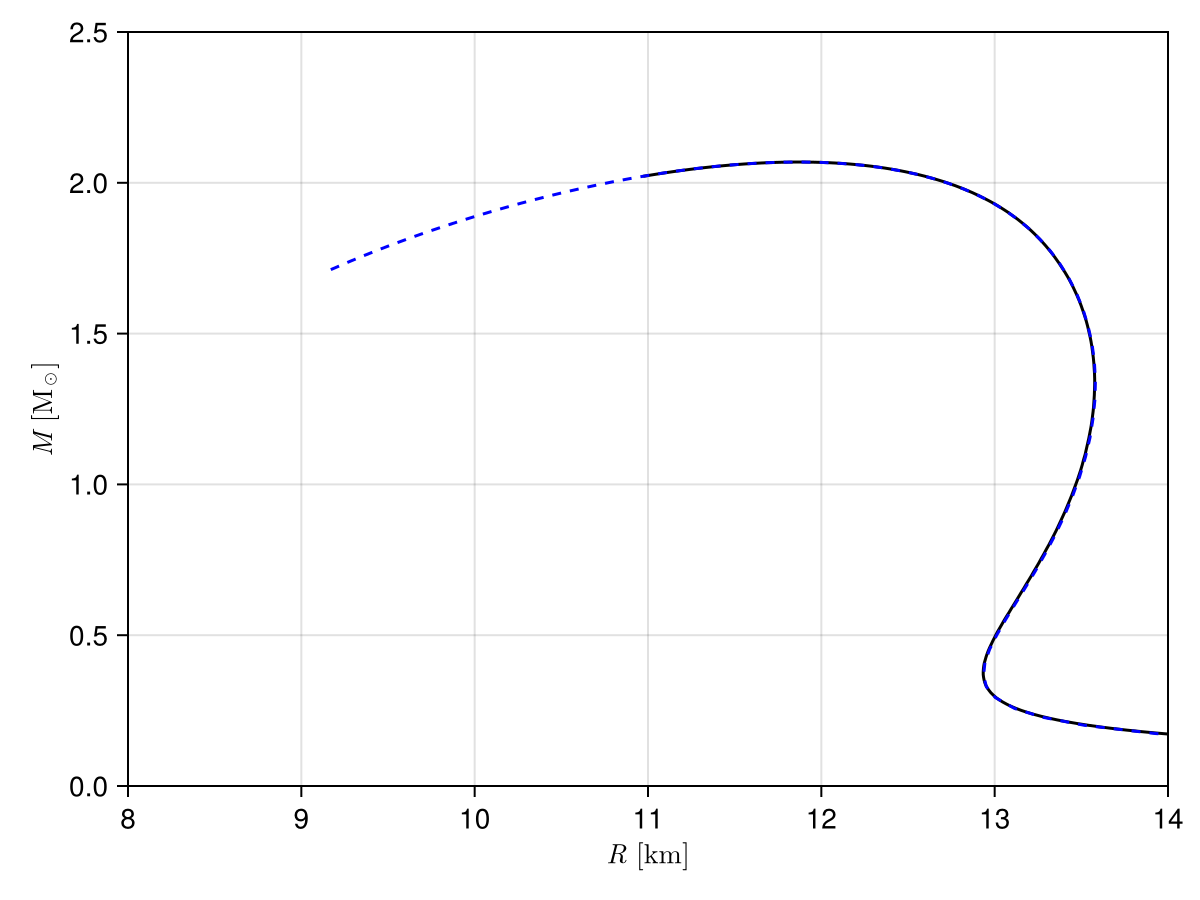

In [46]:
include("tov_diagram.jl")

eosdf = CSV.File("cmf/eos.csv") |> DataFrame
Pvec = eosdf[:,4]
epsvec = eosdf[:,5]

mymrdf = CSV.File("cmf/mrdiagram.csv") |> DataFrame

n = 200
@time R, M = MR_diagram(Pvec, epsvec, n)

outdf = DataFrame(R=R, M=M)
CSV.write("mrdiagramsave.csv", outdf)

# dat2csv("composemrbhk.dat")
# composemrdf = CSV.File("composemrbhk.csv") |> DataFrame

# dat2csv("composemrkbh.dat")
# composemrdf = CSV.File("composemrkbh.csv") |> DataFrame

dat2csv("composemrcmf.dat")
composemrdf = CSV.File("composemrcmf.csv") |> DataFrame

fig = Figure()

ax = Axis(fig[1, 1],
    xlabel=L"$R$ [km]",
    ylabel=L"$M$ [M$_\odot$]",  
    limits=(8,14,0,2.5)
)

lines!(ax, R, M, color=:black)
lines!(ax, mymrdf[:,3], mymrdf[:,2], color=:red, linestyle=:dash)
lines!(ax, composemrdf[:,1], composemrdf[:,2], color=:blue, linestyle=:dash)

fig